In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1')

In [3]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

<Axes: xlabel='date'>

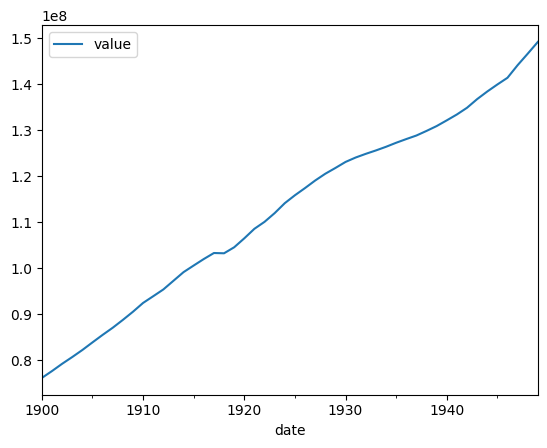

In [4]:
df.plot()

## POPH 1

### Moving Average

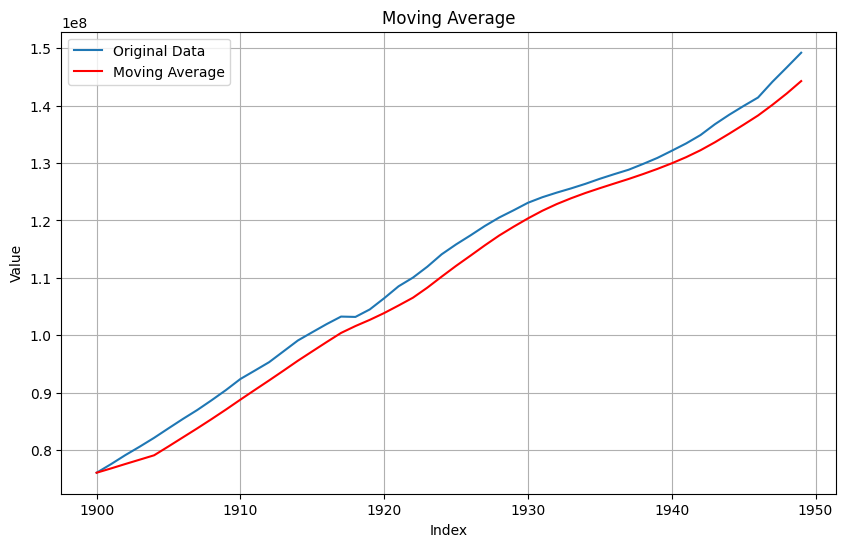

Bias: -2791194.202666666
Mean Absolute Error: 2791194.202666666
Root Mean Squared Error: 2944967.274381089
Mean Squared Error: 8672832247175.58
Mean Absolute Percentage Error: 2.5277051452138695
Prediction Accuracy: 97.52278035515974


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Calculate moving average
window_size = 5
moving_avg = df['value'].rolling(window=window_size, min_periods=1).mean()

# Plot original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original Data')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Calculating metrics
actual_value = df['value']
predicted_value = moving_avg
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

### Exponential Smoothing 

In [6]:
# Load data from CSV
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1')

In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [8]:
train=df[0:-5] 
test=df[-5:]

In [9]:
print(train.shape)
print(test.shape)

(45, 1)
(5, 1)


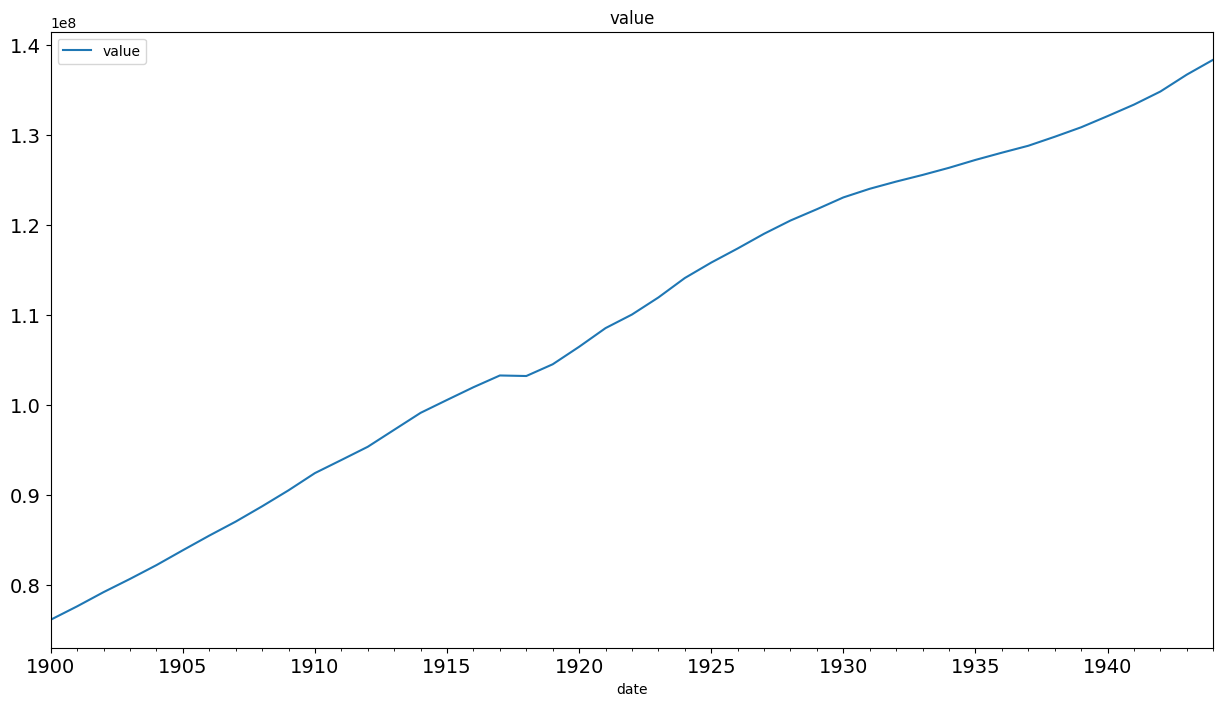

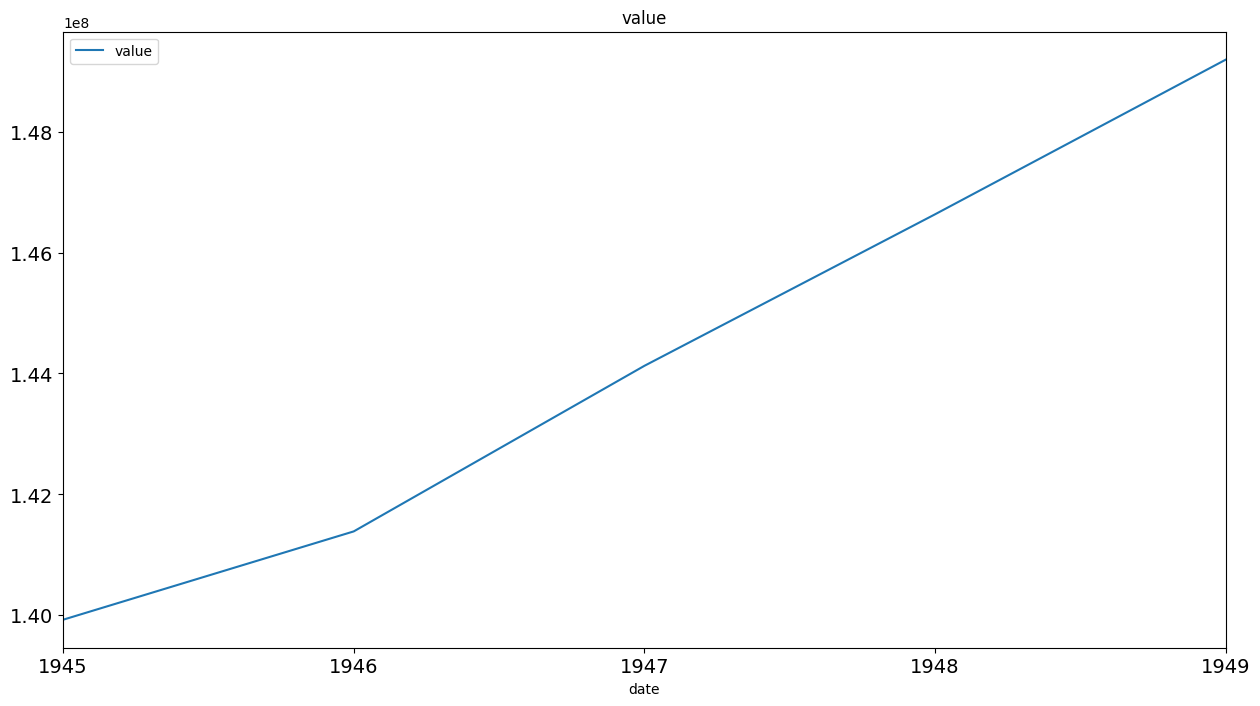

In [10]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'value', fontsize=14)
test.plot(figsize=(15,8), title= 'value', fontsize=14)
plt.show()

#### DES

C:\Users\simra\AppData\Local\Temp\ipykernel_5992\1483827012.py:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.1, smoothing_slope=0.2)
C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE: 2951443.40
MSE: 12665261149090.80
RMSE: 3558828.62
MAPE: 2.02%
Bias: -2951443.40
Prediction Accuracy: 97.95%


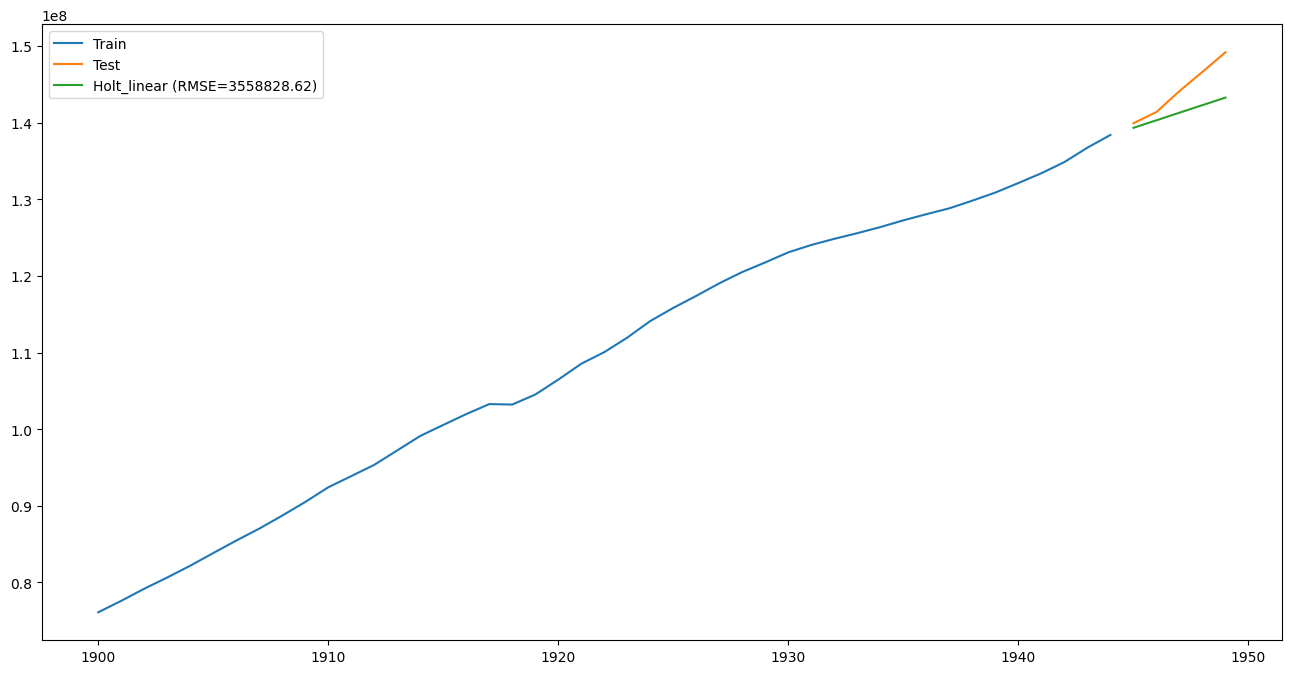

In [11]:
import numpy as np
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import matplotlib.pyplot as plt

# Define additional KPI functions
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred['Holt_linear'] = fit1.forecast(len(test))

# Calculate KPI
mae = mean_absolute_error(test.value, pred.Holt_linear)
mse = mean_squared_error(test.value, pred.Holt_linear)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(test.value, pred.Holt_linear)
bias_val = bias(test.value, pred.Holt_linear)
accuracy = prediction_accuracy(test.value, pred.Holt_linear)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f}%".format(mape))
print("Bias: {:.2f}".format(bias_val))
print("Prediction Accuracy: {:.2f}%".format(accuracy))

# Plot
plt.figure(figsize=(16, 8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

### Linear Regression

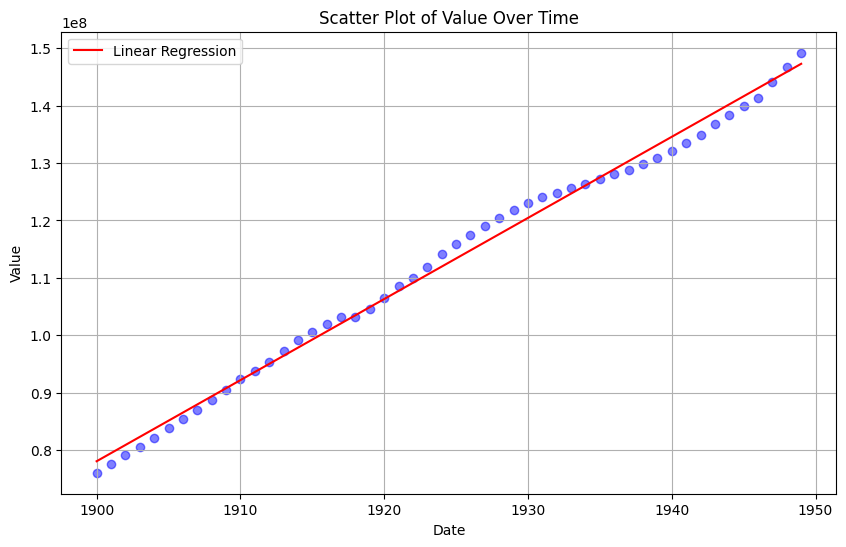

Bias: -1.71661376953125e-07
Mean Absolute Error: 1430178.2000910759
Root Mean Squared Error: 1647388.653974116
Mean Squared Error: 2713889377242.65
Mean Absolute Percentage Error: 1.279394691137045
Prediction Accuracy: 98.73069902140699


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1', parse_dates=['date'])

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(df[['ordinal_date']], df['value'])

# Predicting values
predictions = model.predict(df[['ordinal_date']])

# Plot the regression line
plt.plot(df['date'], predictions, color='red', label='Linear Regression')

plt.legend()
plt.show()

# Performance Metrics
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Calculating metrics
actual_value = df['value']
predicted_value = predictions
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


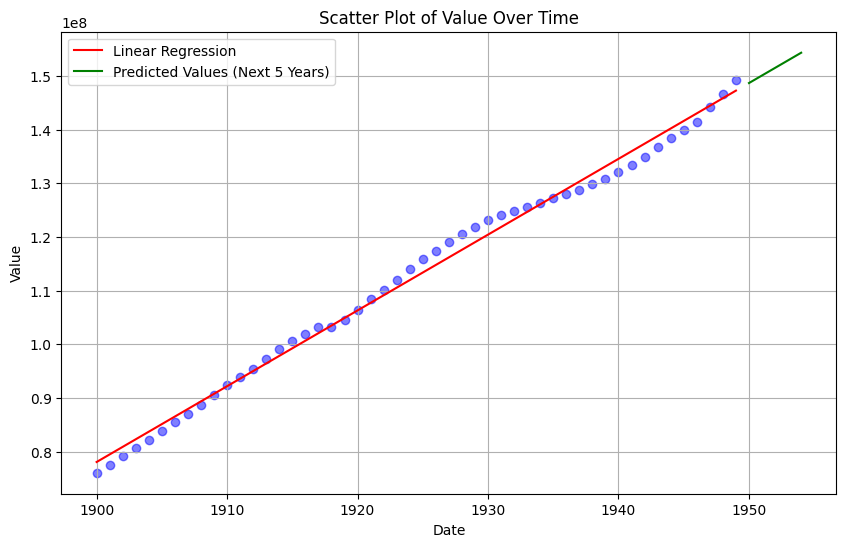

Predicted values for the next 5 years:
Year 1950: 148670941.9678445
Year 1951: 150081586.05742407
Year 1952: 151492230.14700365
Year 1953: 152906739.01491117
Year 1954: 154317383.10449076


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1', parse_dates=['date'])

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(df[['ordinal_date']], df['value'])

# Predicting values for the next 5 years
last_year = df['date'].dt.year.max()
next_years = pd.Series(range(last_year + 1, last_year + 6))
next_ordinal_dates = pd.to_datetime(next_years, format='%Y').map(lambda x: x.toordinal())
next_predictions = model.predict(np.array(next_ordinal_dates).reshape(-1, 1))

# Plot the regression line
plt.plot(df['date'], model.predict(df[['ordinal_date']]), color='red', label='Linear Regression')

# Plot the predicted values for the next 5 years
plt.plot(pd.to_datetime(next_years, format='%Y'), next_predictions, color='green', label='Predicted Values (Next 5 Years)')

plt.legend()
plt.show()

# Print the predicted values for the next 5 years
print("Predicted values for the next 5 years:")
for year, prediction in zip(next_years, next_predictions):
    print(f"Year {year}: {prediction}")

### ARIMA

In [14]:
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1', index_col ='date', parse_dates =True)
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [15]:
df.head()

,value
date,
1900-01-01,76094000
1901-01-01,77584000
1902-01-01,79163000
1903-01-01,80632000
1904-01-01,82166000


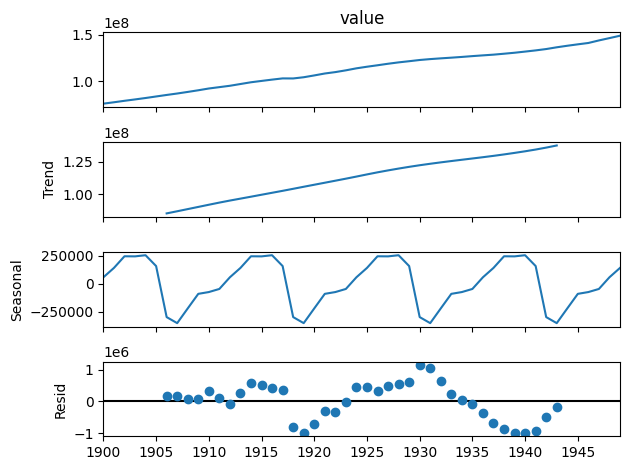

In [16]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['value'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# Run Dicky-Fuller test
result = adfuller(df['value'])

In [19]:
# Print test statistic
print(result)

(0.3019721683911331, 0.9774347875692976, 1, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 1096.9837459233058)


In [20]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [21]:
# Run Dicky-Fuller test
result = adfuller(df_diff['value'])

In [22]:
# Print test statistic
print(result)

(-2.6356594923167975, 0.0858488359178522, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 1067.7065173824844)


In [23]:
# Make it stationary Take the second difference of the data
df_diff_2 = df_diff.diff().dropna()

In [24]:
# Run Dicky-Fuller test
result = adfuller(df_diff_2['value'])

In [25]:
# Print test statistic
print(result)

(-6.7343741328082185, 3.2353976648074957e-09, 1, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 1070.4640579721745)


In [26]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

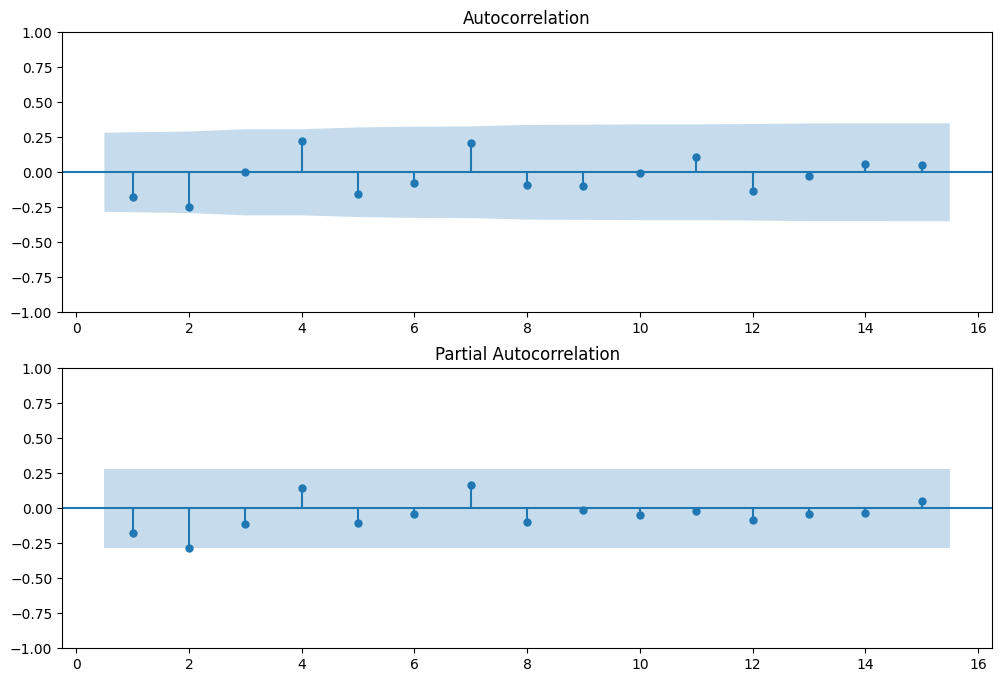

In [27]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff_2, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff_2, lags=15, zero=False, ax=ax2)

plt.show()

### LSTM

1/1 [==============================] - 0s 24ms/step
Train Score: 7001438.166 RMSE
Test Score: 9434934.701 RMSE

KPI Results:
Bias: 439160.27083333366
Mean Absolute Error: 6171482.395833333
Root Mean Squared Error: 7235557.413829898
Mean Squared Error: 52353291088828.805
Mean Absolute Percentage Error: 5.958197407337738
Prediction Accuracy: 94.53216177921632


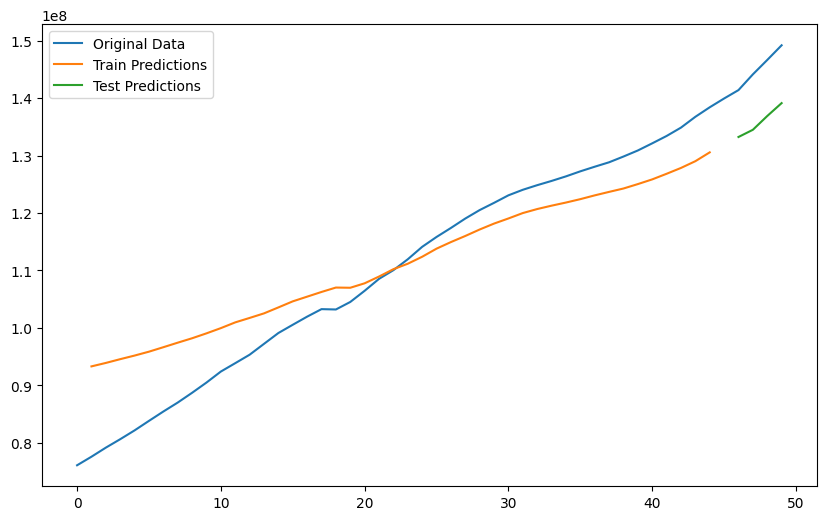

In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def calculate_kpis(actual, predicted):
    def bias(actual, predicted):
        return np.mean(predicted - actual)
    
    def mean_absolute_error(actual, predicted):
        return np.mean(np.abs(predicted - actual))
    
    def root_mean_squared_error(actual, predicted):
        return np.sqrt(np.mean(np.square(predicted - actual)))
    
    def mean_squared_error(actual, predicted):
        return np.mean(np.square(predicted - actual))
    
    def mean_absolute_percentage_error(actual, predicted):
        epsilon = 1e-10  # Small epsilon to avoid division by zero
        return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100
    
    def prediction_accuracy(actual, predicted):
        return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100
    
    bias_value = bias(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = root_mean_squared_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    accuracy = prediction_accuracy(actual, predicted)
    
    return {
        'Bias': bias_value,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Mean Squared Error': mse,
        'Mean Absolute Percentage Error': mape,
        'Prediction Accuracy': accuracy
    }


# Load your data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 1')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split into train and test (as in original code)
train = df_scaled[:-5,:]
test = df_scaled[-5:,:]

# Building the 2D array for supervised learning
def create_data(sequence, time_steps):
    data_X, data_Y = [], []
    for i in range(len(sequence)-time_steps):
        data_X.append(sequence[i:i+time_steps])
        data_Y.append(sequence[i+time_steps])
    return np.array(data_X), np.array(data_Y)

time_steps = 1

# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train, time_steps)
test_X, test_Y = create_data(test, time_steps)

# transform input from [samples, features] to [samples, timesteps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_X, train_Y, batch_size=32, epochs=100, verbose=0)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y, train_predict[:,0]))
print('Train Score: %.3f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_Y, test_predict[:,0]))
print('Test Score: %.3f RMSE' % test_score)

# Calculate KPIs
kpi_results = calculate_kpis(np.concatenate((train_Y, test_Y)), np.concatenate((train_predict, test_predict)))
print("\nKPI Results:")
for kpi, value in kpi_results.items():
    print(f"{kpi}: {value}")

# Shifting train predictions for plotting
train_plot = np.empty_like(df_scaled)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

# Shifting test predictions for plotting
test_plot = np.empty_like(df_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(train_predict)+(time_steps*2)+len(test_predict), :] = test_predict

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Original Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()

## POPH 2

### Moving Average

Bias: -3769391.4097505677
MAE: 3769391.4097505677
RMSE: 4049972.772323198
MSE: 16402279456559.25
MAPE: 2.371887265257568
Prediction Accuracy: 97.57789630384919


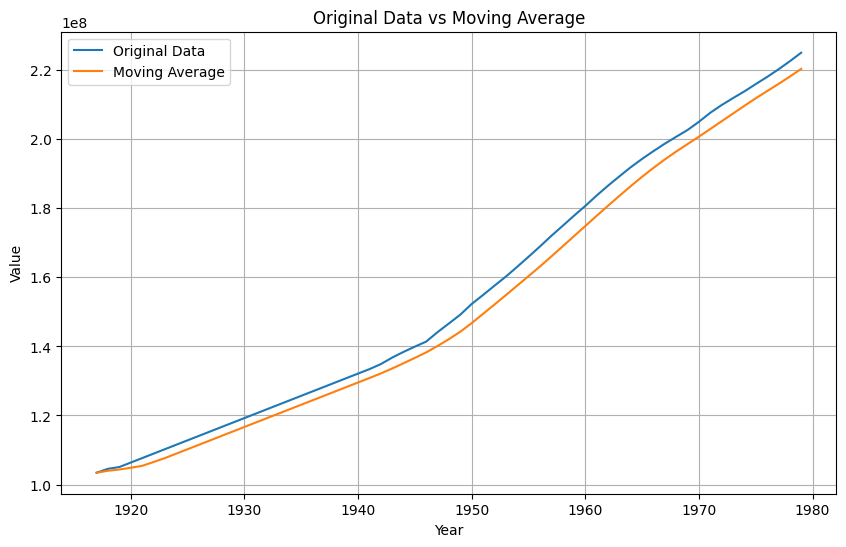

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2')

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Reindex the DataFrame to include all years from 1917 to 1979
all_years = pd.date_range(start='1917-01-01', end='1979-01-01', freq='AS')
df = df.reindex(all_years)

# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

# Calculate the moving average with a specified window size
window_size = 5  # Adjust as needed
moving_avg = df['value'].rolling(window=window_size, min_periods=1).mean()

# Define evaluation functions
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Suppose you have a simple prediction based on the moving average
predicted_values = moving_avg

# Calculate performance metrics
bias_value = bias(df['value'], predicted_values)
mae_value = mean_absolute_error(df['value'], predicted_values)
rmse_value = root_mean_squared_error(df['value'], predicted_values)
mse_value = mean_squared_error(df['value'], predicted_values)
mape_value = mean_absolute_percentage_error(df['value'], predicted_values)
accuracy = prediction_accuracy(df['value'], predicted_values)

print("Bias:", bias_value)
print("MAE:", mae_value)
print("RMSE:", rmse_value)
print("MSE:", mse_value)
print("MAPE:", mape_value)
print("Prediction Accuracy:", accuracy)

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(moving_avg.index, moving_avg, label='Moving Average')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Original Data vs Moving Average')
plt.legend()
plt.grid(True)
plt.show()

### Exponential Smoothing

In [30]:
# Load data from CSV
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2')

In [31]:
# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

In [32]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [33]:
train=df[0:-5] 
test=df[-5:]

In [34]:
print(train.shape)
print(test.shape)

(58, 1)
(5, 1)


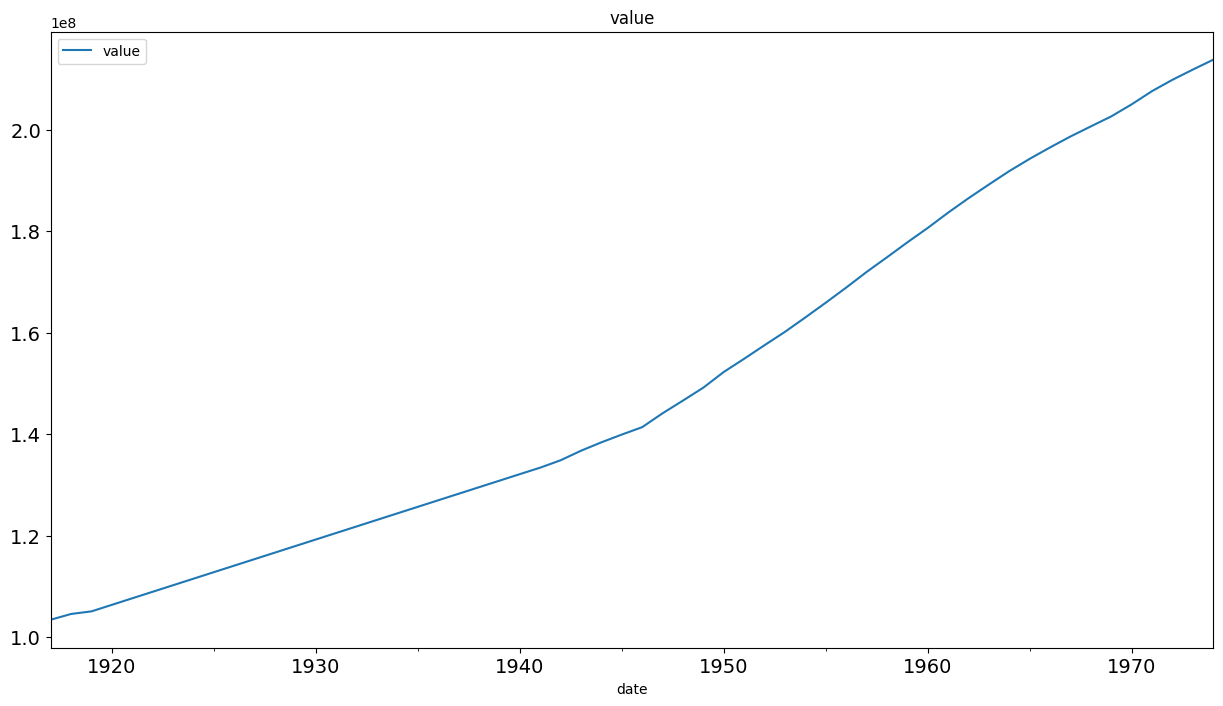

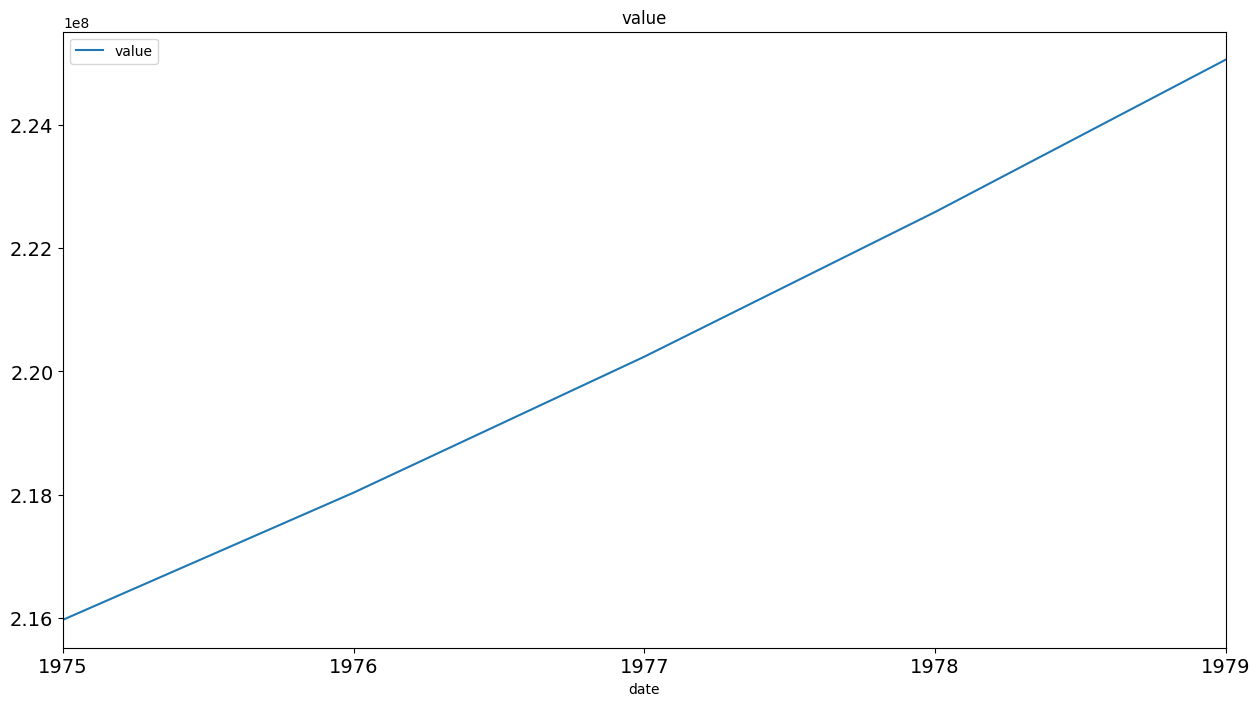

In [35]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'value', fontsize=14)
test.plot(figsize=(15,8), title= 'value', fontsize=14)
plt.show()

#### DES

C:\Users\simra\AppData\Local\Temp\ipykernel_5992\1079434022.py:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.2, smoothing_slope=0.2)
C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE: 1839942.96
MSE: 3398534630394.19
RMSE: 1843511.49
MAPE: 0.84%
Bias: 1839942.96
Prediction Accuracy: 99.17%


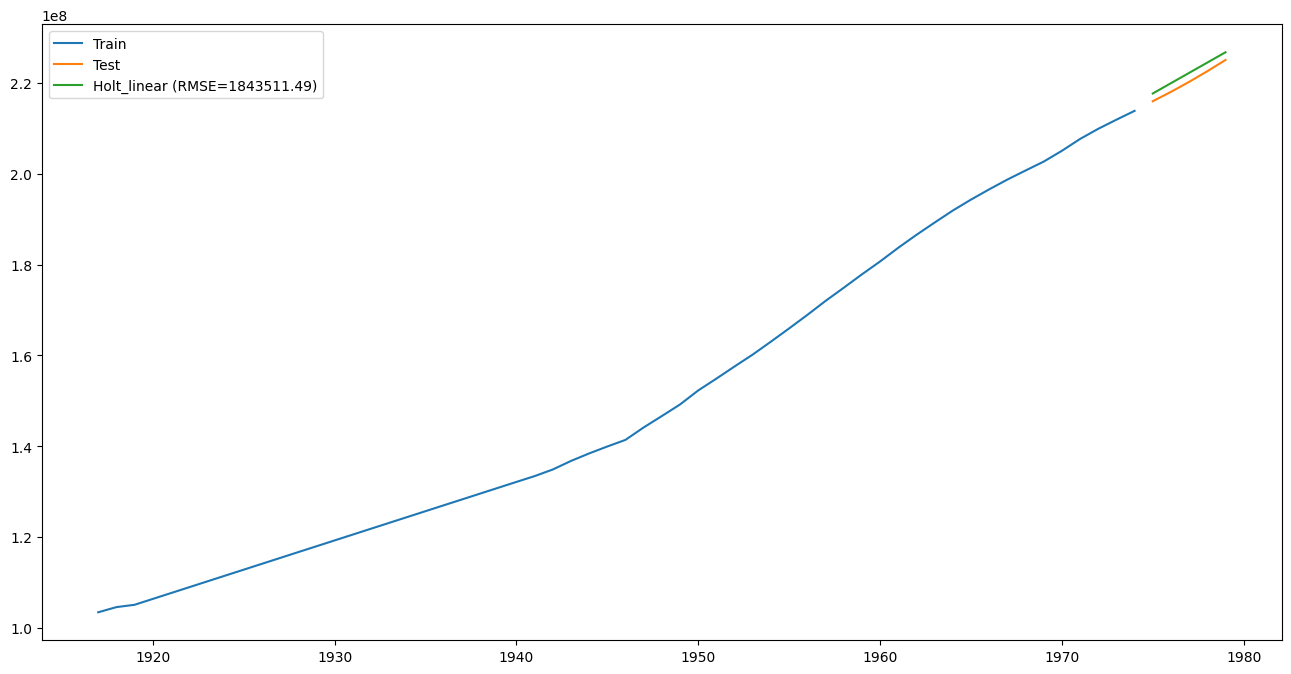

In [36]:
import numpy as np
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import matplotlib.pyplot as plt

# Define additional KPI functions
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.2, smoothing_slope=0.2)
pred['Holt_linear'] = fit1.forecast(len(test))

# Calculate KPI
mae = mean_absolute_error(test.value, pred.Holt_linear)
mse = mean_squared_error(test.value, pred.Holt_linear)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(test.value, pred.Holt_linear)
bias_val = bias(test.value, pred.Holt_linear)
accuracy = prediction_accuracy(test.value, pred.Holt_linear)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f}%".format(mape))
print("Bias: {:.2f}".format(bias_val))
print("Prediction Accuracy: {:.2f}%".format(accuracy))

# Plot
plt.figure(figsize=(16, 8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

### Linear Regression

Bias: 4.238552517361111e-07
Mean Absolute Error: 5032377.482403395
Root Mean Squared Error: 5759528.012073073
Mean Squared Error: 33172162921854.402
Mean Absolute Percentage Error: 3.558330938186391
Prediction Accuracy: 96.76633738034597


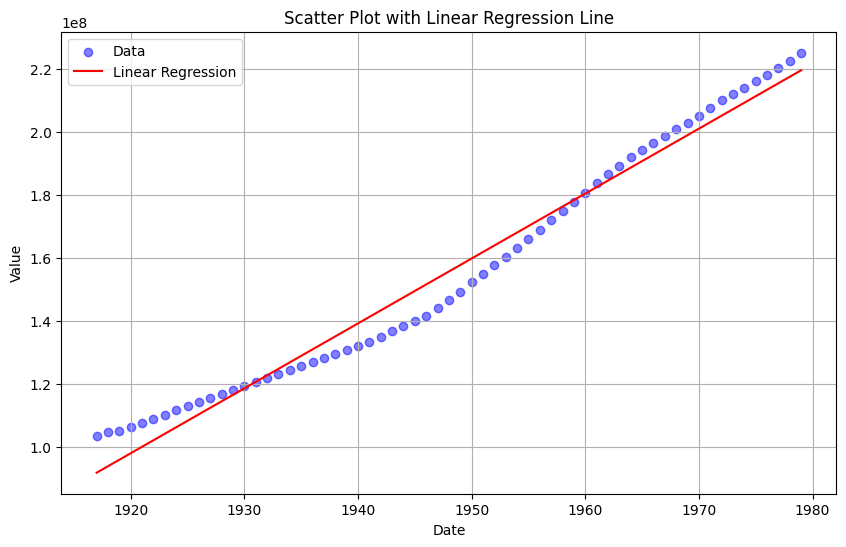

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2', parse_dates=['date'])

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(df[['ordinal_date']], df['value'])

# Predicting values
predictions = model.predict(df[['ordinal_date']])

# Performance Metrics
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Calculating metrics
actual_value = df['value']
predicted_value = predictions
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

# Plot the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5, label='Data')
plt.plot(df['date'], predictions, color='red', label='Linear Regression')
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


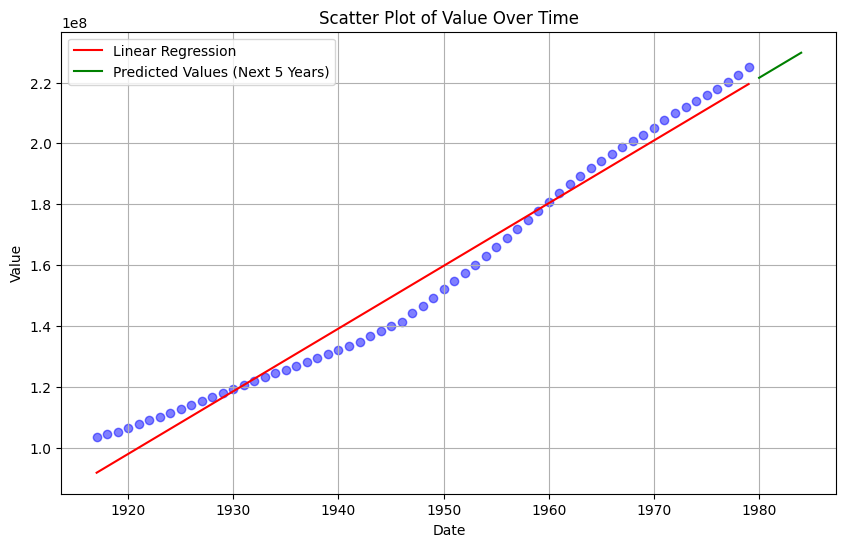

Predicted values for the next 5 years:
Year 1980: 221554170.83813715
Year 1981: 223618764.94124937
Year 1982: 225677718.0768671
Year 1983: 227736671.21248484
Year 1984: 229795624.3481021


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
 
# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2', parse_dates=['date'])
 
# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)
 
# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')
 
# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())
 
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
 
# Creating the linear regression model
model = LinearRegression()
 
# Fitting the model
model.fit(df[['ordinal_date']], df['value'])
 
# Predicting values for the next 5 years
last_year = df['date'].dt.year.max()
next_years = pd.Series(range(last_year + 1, last_year + 6))
next_ordinal_dates = pd.to_datetime(next_years, format='%Y').map(lambda x: x.toordinal())
next_predictions = model.predict(np.array(next_ordinal_dates).reshape(-1, 1))
 
# Plot the regression line
plt.plot(df['date'], model.predict(df[['ordinal_date']]), color='red', label='Linear Regression')
 
# Plot the predicted values for the next 5 years
plt.plot(pd.to_datetime(next_years, format='%Y'), next_predictions, color='green', label='Predicted Values (Next 5 Years)')
 
plt.legend()
plt.show()
 
# Print the predicted values for the next 5 years
print("Predicted values for the next 5 years:")
for year, prediction in zip(next_years, next_predictions):
    print(f"Year {year}: {prediction}")

### ARIMA

In [39]:
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2', index_col ='date', parse_dates =True)
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [40]:
# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

In [41]:
df.head()

,value
date,
1917-01-01,1.034140e+08
1918-01-01,1.045500e+08
1919-01-01,1.050630e+08
1920-01-01,1.063515e+08
1921-01-01,1.076401e+08


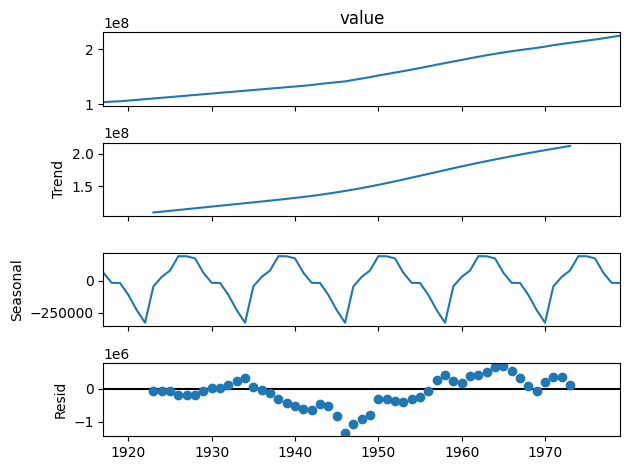

In [42]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['value'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
# Run Dicky-Fuller test
result = adfuller(df['value'])

In [45]:
# Print test statistic
print(result)

(0.9211064125902945, 0.9933596804140373, 1, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 1416.780679034257)


In [46]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [47]:
# Run Dicky-Fuller test
result = adfuller(df_diff['value'])

In [48]:
# Print test statistic
print(result)

(-1.6827609724051147, 0.44001571216458774, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 1388.0846867103967)


In [49]:
# Make it stationary Take the first difference of the data
df_diff_2 = df_diff.diff().dropna()

In [50]:
# Run Dicky-Fuller test
result = adfuller(df_diff_2['value'])

In [51]:
# Print test statistic
print(result)

(-10.24780170956335, 4.568787991804514e-18, 0, 60, {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}, 1363.0236255464931)


In [52]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

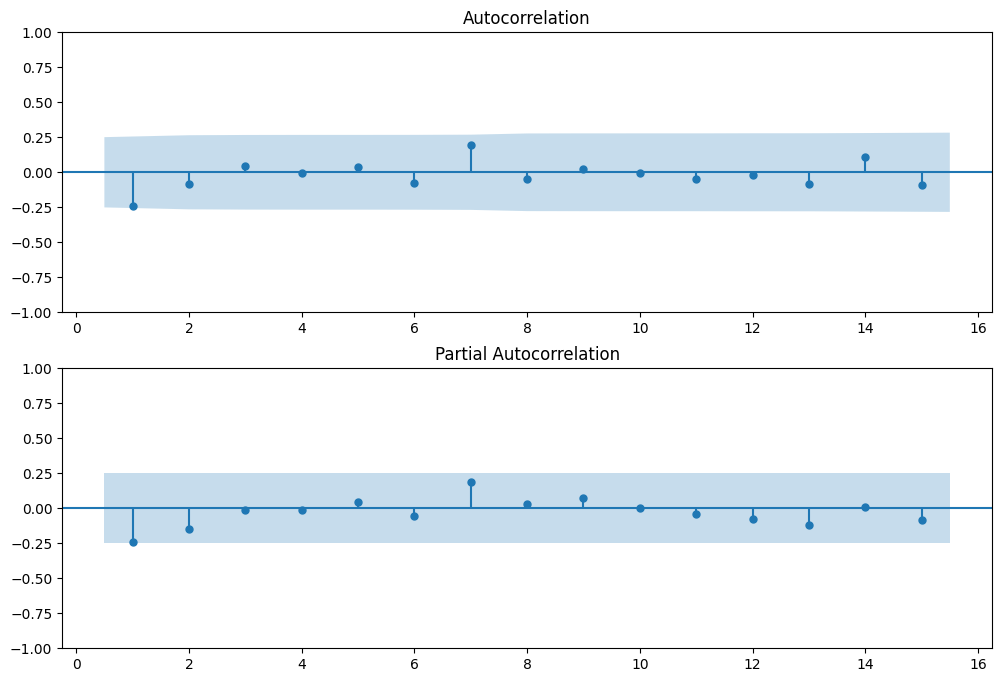

In [53]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff_2, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff_2, lags=15, zero=False, ax=ax2)

plt.show()

### LSTM

1/1 [==============================] - 0s 22ms/step
Train Score: 13018312.161 RMSE
Test Score: 14570296.365 RMSE

KPI Results:
Bias: 2319901.2131147548
Mean Absolute Error: 11723767.836065574
Root Mean Squared Error: 13125704.90329864
Mean Squared Error: 172284129208477.97
Mean Absolute Percentage Error: 8.369202735025038
Prediction Accuracy: 92.46017688726553


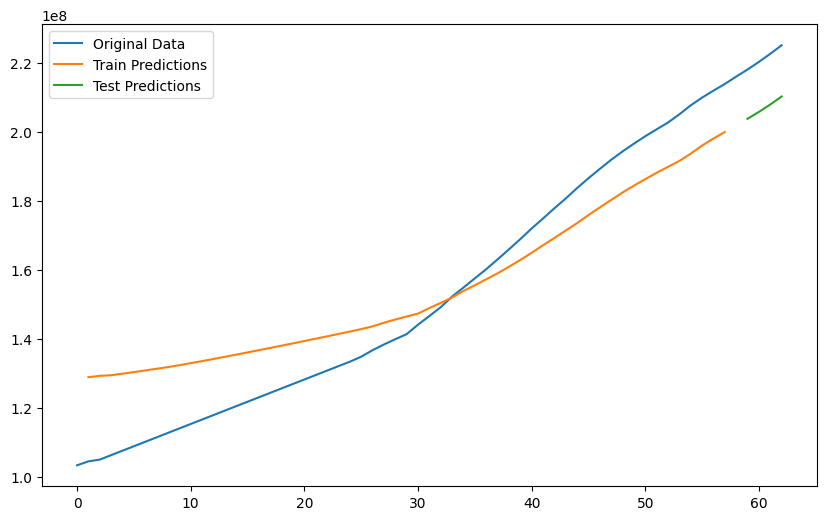

In [54]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def calculate_kpis(actual, predicted):
    def bias(actual, predicted):
        return np.mean(predicted - actual)
    
    def mean_absolute_error(actual, predicted):
        return np.mean(np.abs(predicted - actual))
    
    def root_mean_squared_error(actual, predicted):
        return np.sqrt(np.mean(np.square(predicted - actual)))
    
    def mean_squared_error(actual, predicted):
        return np.mean(np.square(predicted - actual))
    
    def mean_absolute_percentage_error(actual, predicted):
        epsilon = 1e-10  # Small epsilon to avoid division by zero
        return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100
    
    def prediction_accuracy(actual, predicted):
        return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100
    
    bias_value = bias(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = root_mean_squared_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    accuracy = prediction_accuracy(actual, predicted)
    
    return {
        'Bias': bias_value,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Mean Squared Error': mse,
        'Mean Absolute Percentage Error': mape,
        'Prediction Accuracy': accuracy
    }


# Load your data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 2')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Interpolate missing values using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split into train and test (as in original code)
train = df_scaled[:-5,:]
test = df_scaled[-5:,:]

# Building the 2D array for supervised learning
def create_data(sequence, time_steps):
    data_X, data_Y = [], []
    for i in range(len(sequence)-time_steps):
        data_X.append(sequence[i:i+time_steps])
        data_Y.append(sequence[i+time_steps])
    return np.array(data_X), np.array(data_Y)

time_steps = 1

# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train, time_steps)
test_X, test_Y = create_data(test, time_steps)

# transform input from [samples, features] to [samples, timesteps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_X, train_Y, batch_size=32, epochs=100, verbose=0)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y, train_predict[:,0]))
print('Train Score: %.3f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_Y, test_predict[:,0]))
print('Test Score: %.3f RMSE' % test_score)

# Calculate KPIs
kpi_results = calculate_kpis(np.concatenate((train_Y, test_Y)), np.concatenate((train_predict, test_predict)))
print("\nKPI Results:")
for kpi, value in kpi_results.items():
    print(f"{kpi}: {value}")

# Shifting train predictions for plotting
train_plot = np.empty_like(df_scaled)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

# Shifting test predictions for plotting
test_plot = np.empty_like(df_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(train_predict)+(time_steps*2)+len(test_predict), :] = test_predict

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Original Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()

## POPH 3

### Moving Average

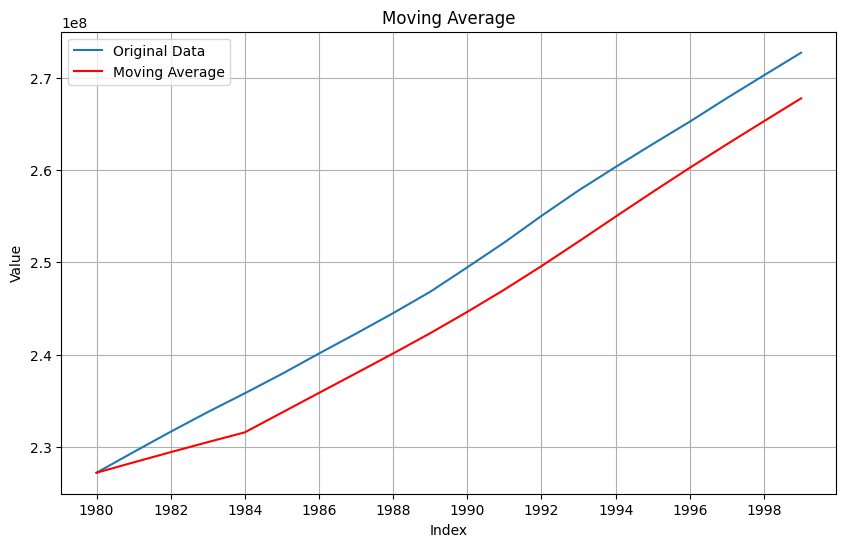

Bias: -4189287.8341666684
Mean Absolute Error: 4189287.8341666684
Root Mean Squared Error: 4429264.191056522
Mean Squared Error: 19618381274175.586
Mean Absolute Percentage Error: 1.6609269160488354
Prediction Accuracy: 98.31861748004224


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100


# Calculate moving average
window_size = 5
moving_avg = df['value'].rolling(window=window_size, min_periods=1).mean()

# Plot original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(df['value'], label='Original Data')
plt.plot(moving_avg, color='red', label='Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Calculating metrics
actual_value = df['value']
predicted_value = moving_avg
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

### Exponential Smoothing

In [56]:
# Load data from CSV
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3')

In [57]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [58]:
train=df[0:-5] 
test=df[-5:]

In [59]:
print(train.shape)
print(test.shape)

(15, 1)
(5, 1)


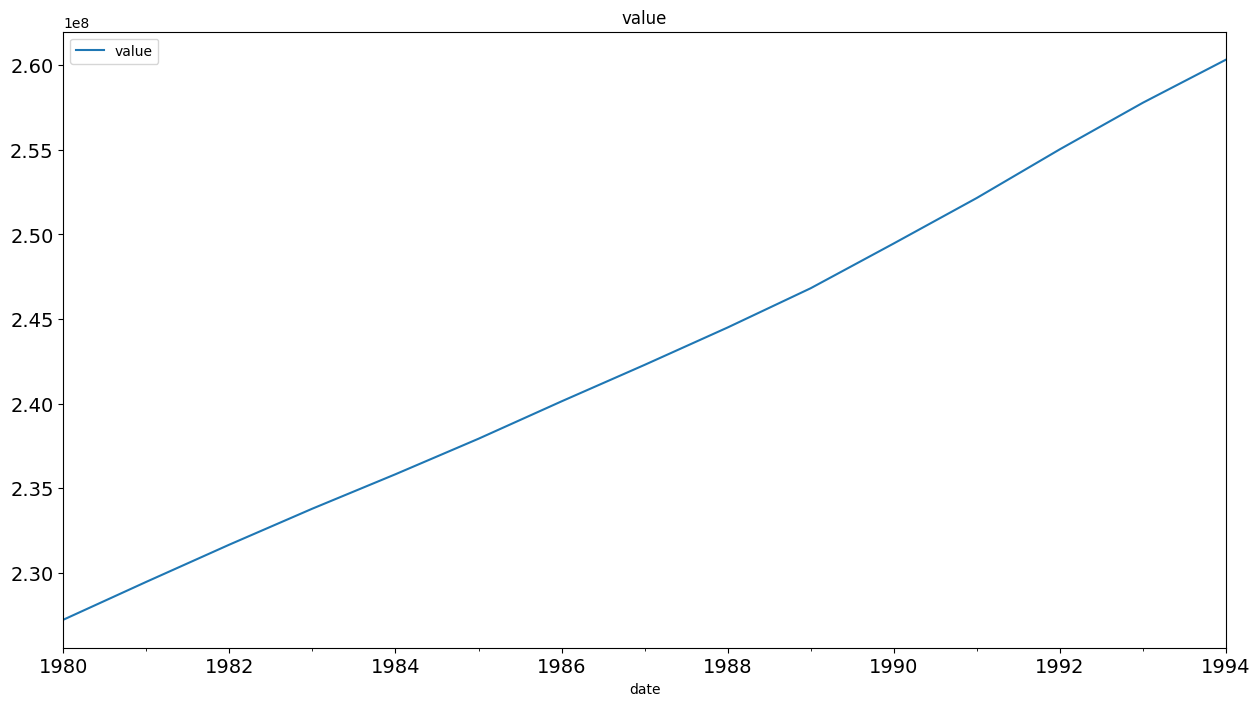

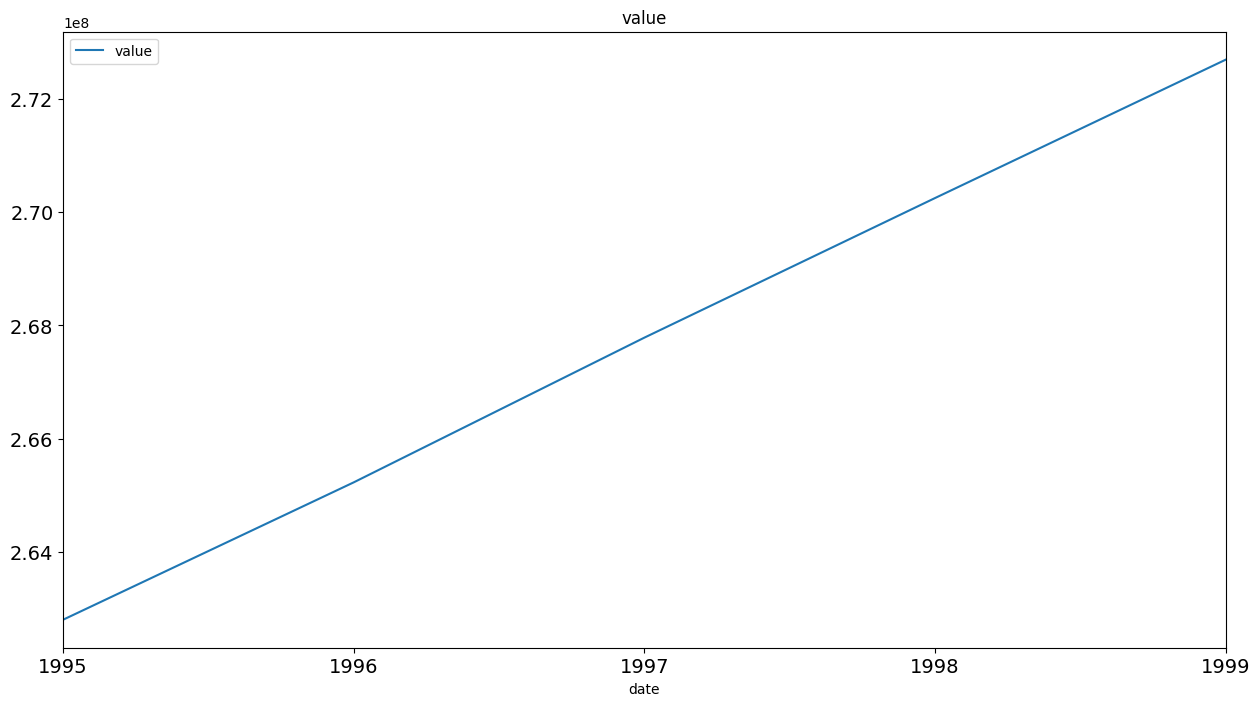

In [60]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'value', fontsize=14)
test.plot(figsize=(15,8), title= 'value', fontsize=14)
plt.show()

#### DES

C:\Users\simra\AppData\Local\Temp\ipykernel_5992\1483827012.py:29: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.1, smoothing_slope=0.2)
C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE: 3278274.35
MSE: 10943420351217.97
RMSE: 3308084.09
MAPE: 1.22%
Bias: -3278274.35
Prediction Accuracy: 98.78%


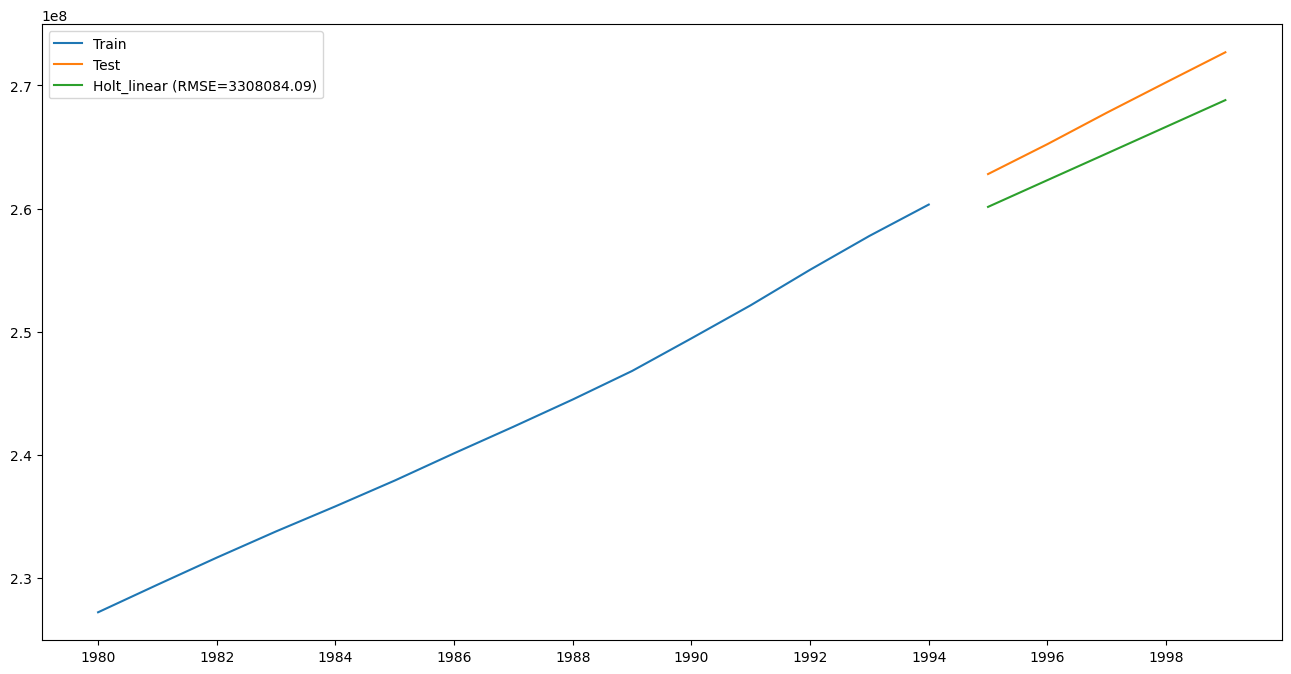

In [61]:
import numpy as np
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import matplotlib.pyplot as plt

# Define additional KPI functions
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred['Holt_linear'] = fit1.forecast(len(test))

# Calculate KPI
mae = mean_absolute_error(test.value, pred.Holt_linear)
mse = mean_squared_error(test.value, pred.Holt_linear)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(test.value, pred.Holt_linear)
bias_val = bias(test.value, pred.Holt_linear)
accuracy = prediction_accuracy(test.value, pred.Holt_linear)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f}%".format(mape))
print("Bias: {:.2f}".format(bias_val))
print("Prediction Accuracy: {:.2f}%".format(accuracy))

# Plot
plt.figure(figsize=(16, 8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

### Linear Regression

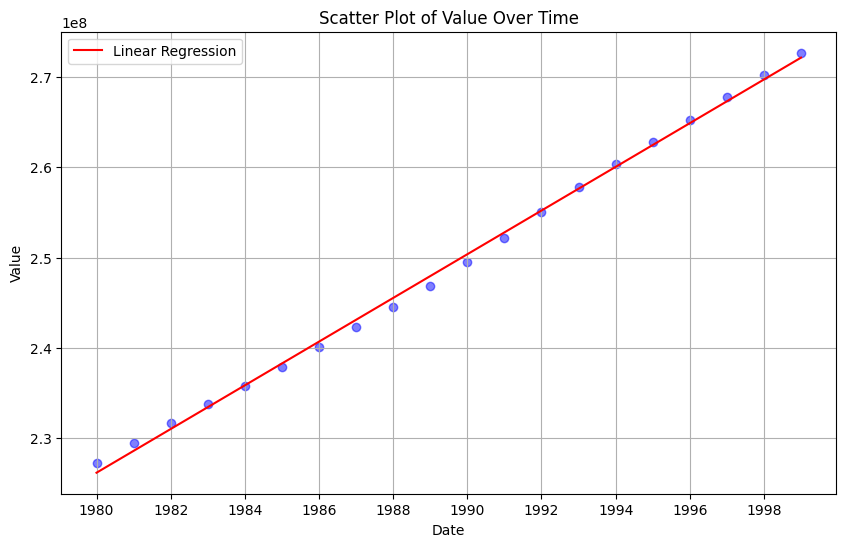

Bias: -3.337860107421875e-07
Mean Absolute Error: 560504.7761509418
Root Mean Squared Error: 642440.3979023637
Mean Squared Error: 412729664856.9474
Mean Absolute Percentage Error: 0.22807377111333213
Prediction Accuracy: 99.77503982292959


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3', parse_dates=['date'])

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(df[['ordinal_date']], df['value'])

# Predicting values
predictions = model.predict(df[['ordinal_date']])

# Plot the regression line
plt.plot(df['date'], predictions, color='red', label='Linear Regression')

plt.legend()
plt.show()

# Performance Metrics
def bias(actual, predicted):
    return np.mean(predicted - actual)

def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(predicted - actual))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((predicted - actual)**2))

def mean_squared_error(actual, predicted):
    return np.mean((predicted - actual)**2)

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def prediction_accuracy(actual, predicted):
    return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100

# Calculating metrics
actual_value = df['value']
predicted_value = predictions
bias_value = bias(actual_value, predicted_value)
print("Bias:", bias_value)

mae = mean_absolute_error(actual_value, predicted_value)
print("Mean Absolute Error:", mae)

rmse = root_mean_squared_error(actual_value, predicted_value)
print("Root Mean Squared Error:", rmse)

mse = mean_squared_error(actual_value, predicted_value)
print("Mean Squared Error:", mse)

mape = mean_absolute_percentage_error(actual_value, predicted_value)
print("Mean Absolute Percentage Error:", mape)

accuracy = prediction_accuracy(actual_value, predicted_value)
print("Prediction Accuracy:", accuracy)

C:\Users\simra\Anaconda3\envs\DAB200\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


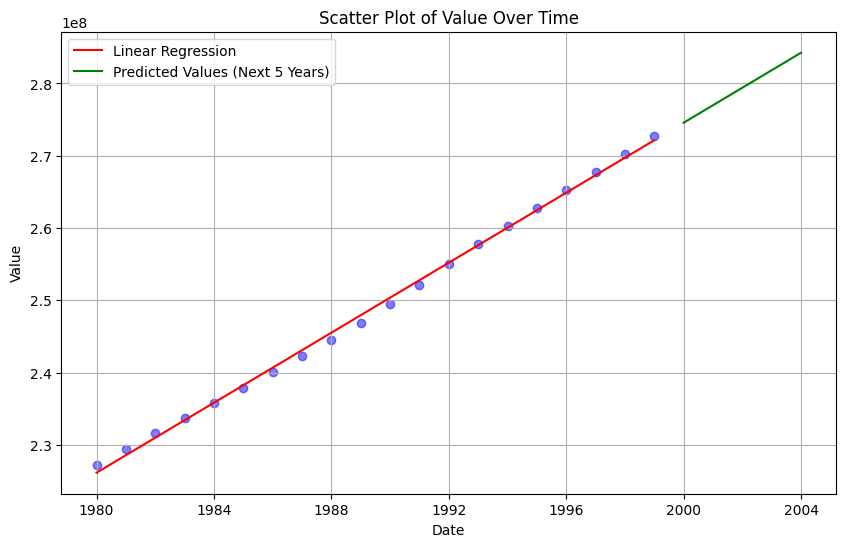

Predicted values for the next 5 years:
Year 2000: 274566837.1959238
Year 2001: 276991996.26895523
Year 2002: 279410529.22430134
Year 2003: 281829062.17964745
Year 2004: 284247595.1349926


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3', parse_dates=['date'])

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Convert 'date' column to ordinal values
df['ordinal_date'] = df['date'].map(lambda x: x.toordinal())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(df[['ordinal_date']], df['value'])

# Predicting values for the next 5 years
last_year = df['date'].dt.year.max()
next_years = pd.Series(range(last_year + 1, last_year + 6))
next_ordinal_dates = pd.to_datetime(next_years, format='%Y').map(lambda x: x.toordinal())
next_predictions = model.predict(np.array(next_ordinal_dates).reshape(-1, 1))

# Plot the regression line
plt.plot(df['date'], model.predict(df[['ordinal_date']]), color='red', label='Linear Regression')

# Plot the predicted values for the next 5 years
plt.plot(pd.to_datetime(next_years, format='%Y'), next_predictions, color='green', label='Predicted Values (Next 5 Years)')

plt.legend()
plt.show()

# Print the predicted values for the next 5 years
print("Predicted values for the next 5 years:")
for year, prediction in zip(next_years, next_predictions):
    print(f"Year {year}: {prediction}")

### ARIMA

In [64]:
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3', index_col ='date', parse_dates =True)
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

In [65]:
df.head()

,value
date,
1980-01-01,227224681
1981-01-01,229465714
1982-01-01,231664458
1983-01-01,233791994
1984-01-01,235824902


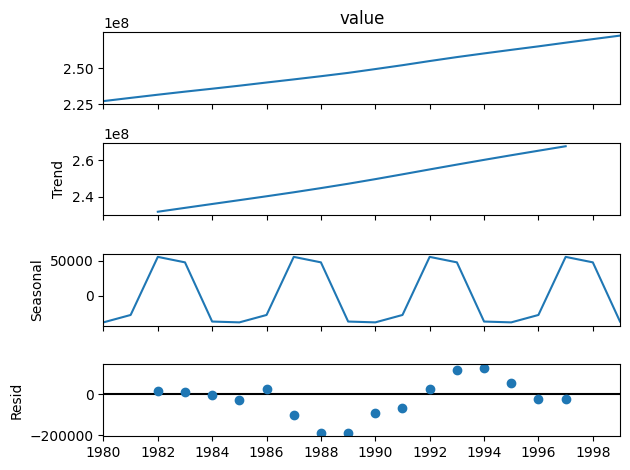

In [66]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['value'], 
                            period=5)

# Plot decomposition
decomp.plot()
plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
# Run Dicky-Fuller test
result = adfuller(df['value'])

In [69]:
# Print test statistic
print(result)

(0.4231796022405329, 0.9823413831814722, 8, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 287.8744011495346)


In [70]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [71]:
# Run Dicky-Fuller test
result = adfuller(df_diff['value'])

In [72]:
# Print test statistic
print(result)

(-3.0012089973384444, 0.034781649286891834, 7, 11, {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}, 287.6864894596613)


In [73]:
# Make it stationary Take the second difference of the data
df_diff_2 = df_diff.diff().dropna()

In [74]:
# Make it stationary Take the second difference of the data
df_diff2 = df.diff().dropna()

In [75]:
# Run Dicky-Fuller test
result = adfuller(df_diff_2['value'])

In [76]:
# Print test statistic
print(result)

(-3.051142351166777, 0.030386577357426947, 0, 17, {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}, 270.4468419429628)


In [77]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

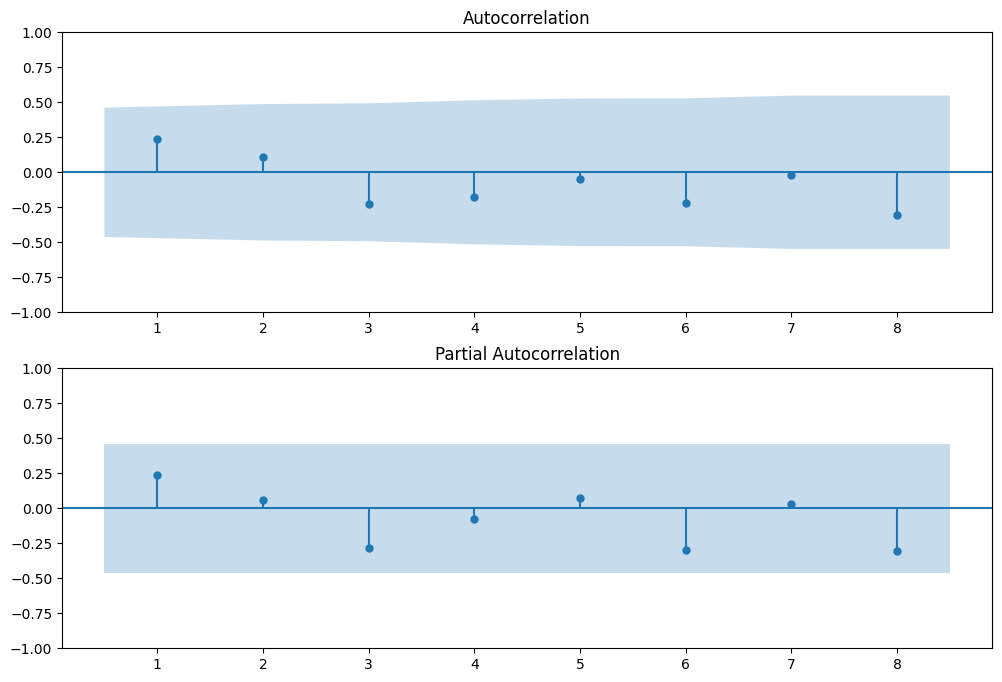

In [79]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff_2, lags=8, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff_2, lags=8, zero=False, ax=ax2)

plt.show()

### LTSM

1/1 [==============================] - 0s 17ms/step
Train Score: 6421157.681 RMSE
Test Score: 12938667.415 RMSE

KPI Results:
Bias: -1395105.055555549
Mean Absolute Error: 7154025.722222219
Root Mean Squared Error: 8322907.415902725
Mean Squared Error: 69270787853688.586
Mean Absolute Percentage Error: 2.8417783427193397
Prediction Accuracy: 97.13400709271404


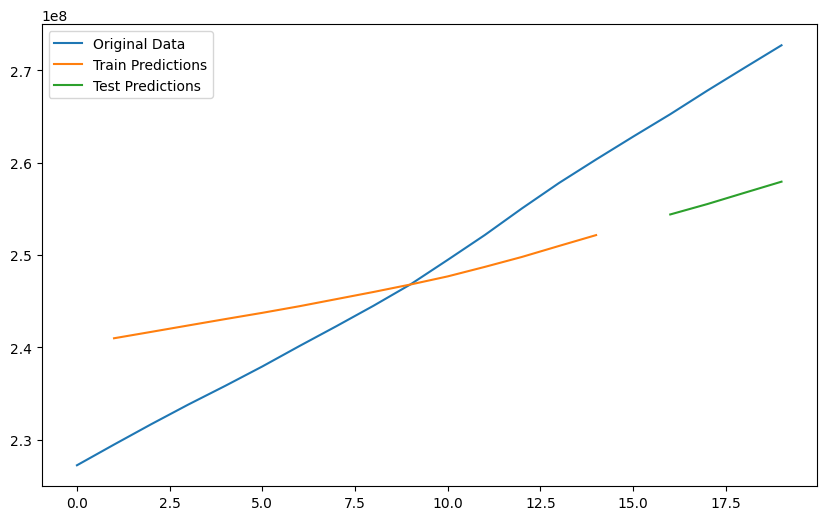

In [80]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def calculate_kpis(actual, predicted):
    def bias(actual, predicted):
        return np.mean(predicted - actual)
    
    def mean_absolute_error(actual, predicted):
        return np.mean(np.abs(predicted - actual))
    
    def root_mean_squared_error(actual, predicted):
        return np.sqrt(np.mean(np.square(predicted - actual)))
    
    def mean_squared_error(actual, predicted):
        return np.mean(np.square(predicted - actual))
    
    def mean_absolute_percentage_error(actual, predicted):
        epsilon = 1e-10  # Small epsilon to avoid division by zero
        return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100
    
    def prediction_accuracy(actual, predicted):
        return (1 - mean_absolute_error(actual, predicted) / np.mean(actual)) * 100
    
    bias_value = bias(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = root_mean_squared_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    accuracy = prediction_accuracy(actual, predicted)
    
    return {
        'Bias': bias_value,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'Mean Squared Error': mse,
        'Mean Absolute Percentage Error': mape,
        'Prediction Accuracy': accuracy
    }


# Load your data from Excel file
df = pd.read_excel('POPH - Copy.xlsx', sheet_name='POPH 3')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Drop 'realtime_start' and 'realtime_end' columns
df.drop(columns=['realtime_start', 'realtime_end'], inplace=True)

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split into train and test (as in original code)
train = df_scaled[:-5,:]
test = df_scaled[-5:,:]

# Building the 2D array for supervised learning
def create_data(sequence, time_steps):
    data_X, data_Y = [], []
    for i in range(len(sequence)-time_steps):
        data_X.append(sequence[i:i+time_steps])
        data_Y.append(sequence[i+time_steps])
    return np.array(data_X), np.array(data_Y)

time_steps = 1

# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train, time_steps)
test_X, test_Y = create_data(test, time_steps)

# transform input from [samples, features] to [samples, timesteps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_X, train_Y, batch_size=32, epochs=100, verbose=0)

# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform(train_Y)
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform(test_Y)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y, train_predict[:,0]))
print('Train Score: %.3f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(test_Y, test_predict[:,0]))
print('Test Score: %.3f RMSE' % test_score)

# Calculate KPIs
kpi_results = calculate_kpis(np.concatenate((train_Y, test_Y)), np.concatenate((train_predict, test_predict)))
print("\nKPI Results:")
for kpi, value in kpi_results.items():
    print(f"{kpi}: {value}")

# Shifting train predictions for plotting
train_plot = np.empty_like(df_scaled)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

# Shifting test predictions for plotting
test_plot = np.empty_like(df_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(train_predict)+(time_steps*2)+len(test_predict), :] = test_predict

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df_scaled), label='Original Data')
plt.plot(train_plot, label='Train Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()